 <img src='../Imagenes/Diplomado.jpg' style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 120%;">

# Introducción a Limpieza de Datos

## Paso 1: Crear las funciones para Trabajo

In [4]:
##Cargue de las librerías
import pandas as pd
import numpy as np
##Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.style.use('ggplot')
##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
##Librerías para over y under sampling
from sklearn.utils import resample

In [5]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

# Función informe sobre los datos NAN


def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

# Función para pintar algo el histograma reemplazamos con la media o mediana


def histoPlot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

# Función para reemplazo de valore numéricos con la mediana


def imputacionNa(df, nomCol, param):
    if param == 'media':
        df[nomCol] = df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol] = df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]
# Funcion para revisar datos categóricos o texto


def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

# Función para datos categóricos modificaciones


def imputacionCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol] == busqueda, reempl, df[nomCol])
    return df[nomCol]

# Función para reeemplazo NA categóricos


def imputacionCatNa(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

# Función para cambiar datos de texto a numerico float64


def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

# Función modificar a 1 y 0 los datos categóricos


def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

# Función para variables dummies


def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

# Función cambiar encabezados del dataframe


def camEncab(df, listaN):
    df.columns = listaN
    return df

# Función para el test de Shapiro - wilk - resistente al ruido en los datos


def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

# Función para normalizar la data min - max sklearn


def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

## Función para Estandarizar la data formula z-score
def stanData(df):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df)
    df_stan = pd.DataFrame(standardized_data, columns=df.columns)
    return df_stan

## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


## Paso 2: Llamado a funciones

In [6]:
##Importar la data
datos = importDatos('C:/Users/INPROTI/Downloads/DocumentacionDiplomadoML/1. LimpiezaDatos/Datasets/','CovidDiagnosis','.xlsx')
datos.head()

,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36°,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38,NO,0.0,Medilaser,negative
2,65.0,NaN,36C,YES,1.0,Carmen Emilia,negative
3,78.0,NaN,39,NOP,1.0,Moncaleano,negative
4,41.0,Masculino,40.,SI,0.0,Medilaser,positive


In [7]:
##Revisión de datos NAN
datos_NA(datos)

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 49 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          3
                                Gender     object            6          3
                           Temperature     object           30          1
                              Headache     object            6         35
                                 Fever    float64            2          7
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


Se evidencian 99 filas y 7 columnas del dataframe inicial, con 49 valores de tipo NAN siendo alrededor de 44% de la data seleccionada. Se encuentran 5 variables de tipo object (aaaaaa), 2 variables de tipo numerico float64 (sssssss). Lo cual supone que se debe proceder a realizar modificaciones de texto a numérico.

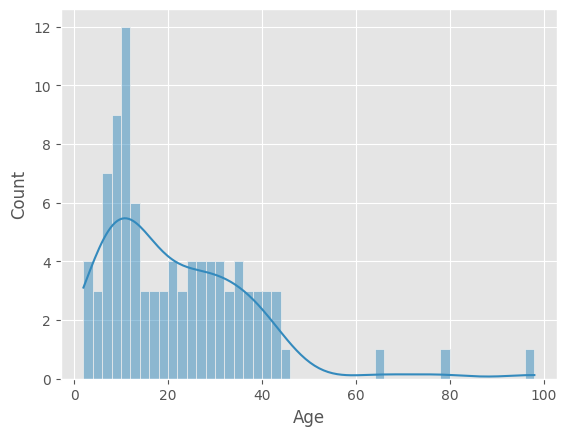

In [8]:
##revisar datos NA con histograma
histoPlot(datos, 'Age', 2) ##se reemplaza los datos con la mediana

In [9]:
##Reemplazo de datos NA (Age) con la mediana
#datos['Age'].isna().sum().sum()

datos['Age'] = imputacionNa(datos, 'Age','mediana')

datos.head()


,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36°,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38,NO,0.0,Medilaser,negative
2,65.0,NaN,36C,YES,1.0,Carmen Emilia,negative
3,78.0,NaN,39,NOP,1.0,Moncaleano,negative
4,41.0,Masculino,40.,SI,0.0,Medilaser,positive


Dimensiones : 99 filas, 7 columnas
Total Valores NA : 39 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          0
                                Gender     object            6          3
                           Temperature     object           30          1
                              Headache     object            6         35
                                 Fever    float64            2          0
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


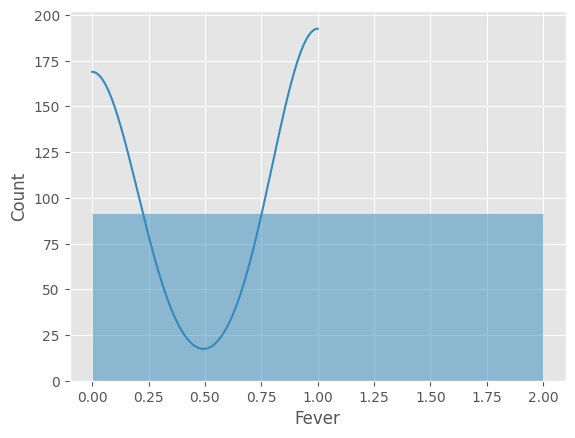

In [10]:
##Revisar la data de manera categórica o numérica
#datos['Fever'].value_counts()
#datos['Fever'].median()
histoPlot(datos, 'Fever', 2)

datos['Fever'] = imputacionNa(datos, 'Fever', 'mediana')

datos_NA(datos)

In [11]:
##Revisión de datos categóricos
revCategoricos(datos, 'Gender')

datos['Gender'] = imputacionCat(datos, 'Gender','Masculinoooo', 'Masculino')
datos['Gender'] = imputacionCat(datos, 'Gender','Masculino…..//', 'Masculino')
datos['Gender'] = imputacionCat(datos, 'Gender','masculino', 'Masculino')

datos['Gender'] = imputacionCat(datos, 'Gender','femenino', 'Femenino')

revCategoricos(datos, 'Gender')

Femenino     65
Masculino    31
Name: Gender, dtype: int64

In [12]:
##Limpieza de datos NA categóricos
datos['Gender'] = imputacionCatNa(datos, 'Gender')

datos_NA(datos)

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 36 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          0
                                Gender     object            2          0
                           Temperature     object           30          1
                              Headache     object            6         35
                                 Fever    float64            2          0
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


In [13]:
##Datos inconsistentes en variable Temperatura
datos['Temperature'] = imputacionCat(datos, 'Temperature', '36C', '36')
datos['Temperature'] = imputacionCat(datos, 'Temperature', '36°', '36')

datos['Temperature']

0       36
1       38
2       36
3       39
4      40.
      ... 
94      42
95      35
96    35.2
97    35.6
98    36.9
Name: Temperature, Length: 99, dtype: object

In [14]:
##Cambio de texto a numerico de tipo float
datos['Temperature'] = cambioTextNum(datos, 'Temperature', 'float64')

datos['Temperature']

0     36.0
1     38.0
2     36.0
3     39.0
4     40.0
      ... 
94    42.0
95    35.0
96    35.2
97    35.6
98    36.9
Name: Temperature, Length: 99, dtype: float64

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 35 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          0
                                Gender     object            2          0
                           Temperature    float64           28          0
                              Headache     object            6         35
                                 Fever    float64            2          0
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


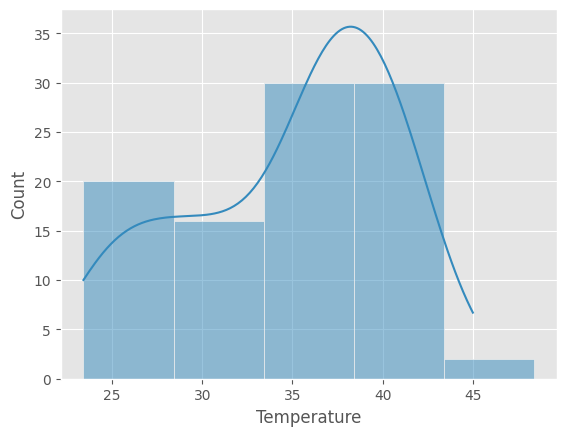

In [15]:
histoPlot(datos, 'Temperature',5)

datos['Temperature'] = imputacionNa(datos, 'Temperature', 'mediana')

datos_NA(datos)

In [16]:
##Dolor de cabeza - categórico
revCategoricos(datos, 'Headache')

datos['Headache'] = imputacionCat(datos, 'Headache','NOP','NO')
datos['Headache'] = imputacionCat(datos, 'Headache','YES','SI')
datos['Headache'] = imputacionCat(datos, 'Headache','OUI','SI')

revCategoricos(datos, 'Headache')

datos['Headache'] = imputacionCat(datos, 'Headache','SI ','SI')

In [17]:
revCategoricos(datos, 'Headache')

datos['Headache'] = imputacionCatNa(datos, 'Headache')

datos_NA(datos)

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          0
                                Gender     object            2          0
                           Temperature    float64           28          0
                              Headache     object            2          0
                                 Fever    float64            2          0
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


In [18]:
##Exportar data con categóricos
datos.to_csv('datosLimpios.csv')

In [19]:
##Cambiar a 1 y 0 los valores de covidDiagnosis, Headache, Gender
datos['Gender'] = camTextBi(datos, 'Gender', 'Femenino', 0, 1)
datos['Headache'] = camTextBi(datos, 'Headache', 'NO', 0, 1)
datos['CovidDiagnosis'] = camTextBi(datos, 'CovidDiagnosis', 'negative', 0, 1)

datos_NA(datos)

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          0
                                Gender      int32            2          0
                           Temperature    float64           28          0
                              Headache      int32            2          0
                                 Fever    float64            2          0
                              Hospital     object            3          0
                        CovidDiagnosis      int32            2          0


In [20]:
datos['Hospital'].value_counts()

Moncaleano       33
Medilaser        33
Carmen Emilia    33
Name: Hospital, dtype: int64

In [21]:
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

datos['Hospital'] = label_e.fit_transform(datos['Hospital'])

datos['Hospital'].value_counts()

2    33
1    33
0    33
Name: Hospital, dtype: int64

In [22]:
##Usar funcion para one hot encoder
dataF = convDummies(datos, 'Hospital')

dataF.head()

,Age,Gender,Temperature,Headache,Fever,CovidDiagnosis,0,1,2
0,12.0,1,36.0,1,1.0,1,0,0,1
1,35.0,0,38.0,0,0.0,0,0,1,0
2,65.0,0,36.0,1,1.0,0,1,0,0
3,78.0,0,39.0,0,1.0,0,0,0,1
4,41.0,1,40.0,1,0.0,1,0,1,0


In [23]:
##Cambiar encabezados
dataF = camEncab(dataF, ['Edad','Genero','Temp','DolorCa','Fiebre','CovidD','CarmenH','MediH','MoncaH'])

dataF.head()

,Edad,Genero,Temp,DolorCa,Fiebre,CovidD,CarmenH,MediH,MoncaH
0,12.0,1,36.0,1,1.0,1,0,0,1
1,35.0,0,38.0,0,0.0,0,0,1,0
2,65.0,0,36.0,1,1.0,0,1,0,0
3,78.0,0,39.0,0,1.0,0,0,0,1
4,41.0,1,40.0,1,0.0,1,0,1,0


In [24]:
##Descripcion de medidas de tendencia central
dataF.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,99.0,21.555556,15.882362,2.00,10.00,18.00,30.5,98.0
Genero,99.0,0.313131,0.466127,0.00,0.00,0.00,1.0,1.0
Temp,99.0,34.855051,5.718094,23.41,30.67,36.35,39.0,45.0
DolorCa,99.0,0.717172,0.452666,0.00,0.00,1.00,1.0,1.0
Fiebre,99.0,0.565657,0.498193,0.00,0.00,1.00,1.0,1.0
CovidD,99.0,0.393939,0.491108,0.00,0.00,0.00,1.0,1.0
CarmenH,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0
MediH,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0
MoncaH,99.0,0.333333,0.473804,0.00,0.00,0.00,1.0,1.0


In [25]:
##Particionar la data
diag = dataF.iloc[3:50, [0,1,2,3,6,7,8]]

diag.head()

,Edad,Genero,Temp,DolorCa,CarmenH,MediH,MoncaH
3,78.0,0,39.0,0,0,0,1
4,41.0,1,40.0,1,0,1,0
5,18.0,0,41.0,0,1,0,0
6,98.0,0,38.5,1,0,0,1
7,12.0,0,38.9,1,0,1,0


In [26]:
##Oversampling y undersampling - nivelar el dataset con la variable que va a ser mi predictora o clasificadora
dataF['CovidD'].value_counts()

##paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = dataF[dataF.CovidD==0]
dataFMenor = dataF[dataF.CovidD==1]

# Over Sampling sobre la clase minoritaria
df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=60,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_Over = pd.concat([dataFMayor, df_minoritaria])
 
# Display new class counts
df_Over.CovidD.value_counts()

0    60
1    60
Name: CovidD, dtype: int64

In [27]:
# Under Sampling sobre la clase mayoritaria
df_mayoritaria = resample(dataFMayor, 
                                 replace=False,     
                                 n_samples=39,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_Under = pd.concat([df_mayoritaria, dataFMenor])
 
# Display new class counts
df_Under.CovidD.value_counts()

0    39
1    39
Name: CovidD, dtype: int64

In [28]:
## Normalización - Cuando la data no es normal   
dataShapiro = testShapiroWilk(dataF)
dataShapiro

,Variable,Valores P,Concepto
0,Edad,1.430420e-08,No es una variable Normal
1,Genero,2.537567e-15,No es una variable Normal
2,Temp,1.067463e-04,No es una variable Normal
3,DolorCa,1.120476e-15,No es una variable Normal
4,Fiebre,1.985352e-14,No es una variable Normal
5,CovidD,1.242337e-14,No es una variable Normal
6,CarmenH,4.091906e-15,No es una variable Normal
7,MediH,4.091906e-15,No es una variable Normal
8,MoncaH,4.091906e-15,No es una variable Normal


<AxesSubplot:>

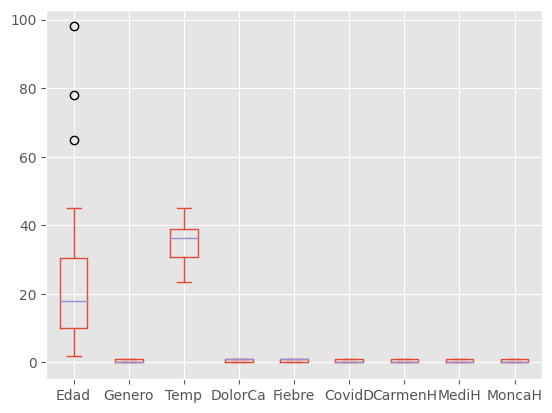

In [29]:
##Gráfico de caja para revisar el estado actual de los datos
dataF.plot.box()
#No hay normalidad en los datos al no tener las mismas medias.

<AxesSubplot:>

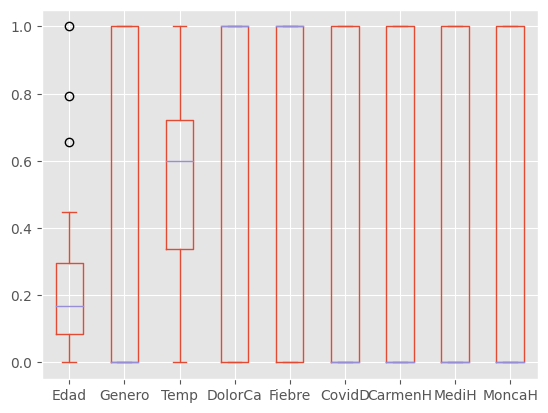

In [30]:
##Normalizar data
dataNorm = normaData(dataF)

##Nivelada de los datos
dataNorm.plot.box()

<AxesSubplot:>

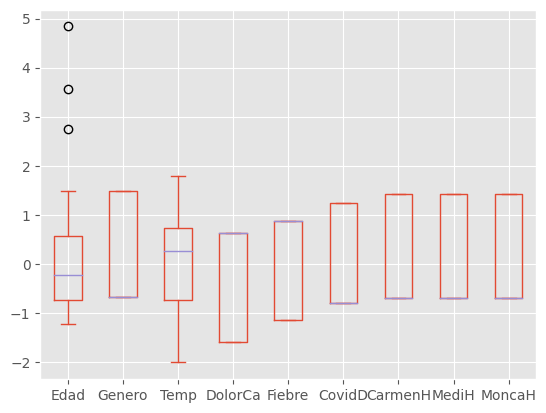

In [31]:
##Estandarización - cuando la data es normal

dataStan = stanData(dataF)

dataStan.plot.box()

##El problema ocurre porque la data no es normal por eso genera ruido.

In [32]:
##Correlaciones
corr_matrix = dataStan.corr(method='spearman')

tidy_corr_matrix(corr_matrix)



,variable_1,variable_2,r,abs_r
18,Temp,Edad,-0.658068,0.658068
2,Edad,Temp,-0.658068,0.658068
79,MoncaH,MediH,-0.500000,0.500000
78,MoncaH,CarmenH,-0.500000,0.500000
71,MediH,MoncaH,-0.500000,0.500000
...,...,...,...,...
53,CovidD,MoncaH,0.000000,0.000000
68,MediH,CovidD,0.000000,0.000000
52,CovidD,MediH,0.000000,0.000000
51,CovidD,CarmenH,0.000000,0.000000


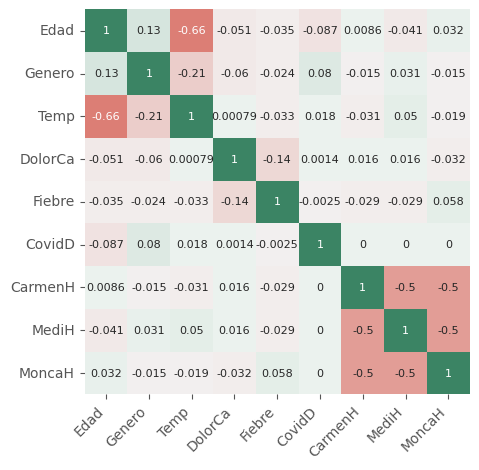

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(15, 150, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [34]:
##Extraer la data normalizada y estandarizada
dataStan.to_csv('dataStandarizada.csv')

dataNorm.to_csv('dataNormalizada.csv')
